<a href="https://colab.research.google.com/github/ukishore33/Analysing-Credit-Card-Dataset/blob/main/Credit_Card_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

#### Introduction:

- A credit card is a convinient tool that allows you to buy items now and pay for them later.
- Credit card is a physical payment card that allows you to get credit from a financial institution.
- If you buy something with credit, you are in debt.
- This means you owe money to the company that gave you the credit card.
- If you don't pay the entire amount at the end of each month, you pay a fee for the credit card called interest.
- If managed correctly, credit cards can be great way to build credit and manage your money.



#### Importance in Today's world:

- Credit score cards are a common risk control method in the financial history.
- It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings.
- The bank is able to decide whether to issue a credit card to  the applicant.
- Credit scores can objectively quantify the magnitude of risk. Credit score is a number that depicts a consumer's credit worthiness.



#### Importance of Predicting a good client:

- Credit risk as the board in banks basically centers around deciding the the probability of customer's default or credit decay and how expensice it will end up being assuming it happens.
- It is important to consider major factors and predict beforehand the probability of consumers defaulting given their conditions, which is where a machine learning model comes in handy and allows the bank and major finantial institutions to predict whether the customer  will defaul or not.
- This project builds a machine learning model with the best accuracy possible.



#### Impact on Banking Sector:

- Banks receive a lot of credit card applications.
- Many of the applications do not get approved for a variety of reasons, like increased loan balances or poor-income levels.
- Manually analysing these applications can be very time consuming and full of human errors.
- Hence we can automate this task with the help of machine learning.


## Initial Hypothesis

- The decision on approval or rejection of applications will be mainly dependent on Income Source, Annual Income, Education, Property owner, Car Owner.

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Importing Dataset

In [ ]:
a=pd.read_csv('Credit_card.csv')
aa=a
b=pd.read_csv('Credit_card_label.csv')
bb=b

In [ ]:
aa

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [ ]:
bb

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


## Merging The two Dataset

In [ ]:
cc=pd.merge(aa, bb,
how='outer', on='Ind_ID')

## Understanding and Manupulating the Dataset
- Unique value Checking
- Null value checking


In [ ]:
cc

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [ ]:
cc.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
cc.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
cc['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
cc[cc['GENDER'] == 'M'].count()

Ind_ID             568
GENDER             568
Car_Owner          568
Propert_Owner      568
CHILDREN           568
Annual_income      559
Type_Income        568
EDUCATION          568
Marital_status     568
Housing_type       568
Birthday_count     558
Employed_days      568
Mobile_phone       568
Work_Phone         568
Phone              568
EMAIL_ID           568
Type_Occupation    438
Family_Members     568
label              568
dtype: int64

In [ ]:
cc[cc['GENDER'] == 'F'].count()

Ind_ID             973
GENDER             973
Car_Owner          973
Propert_Owner      973
CHILDREN           973
Annual_income      959
Type_Income        973
EDUCATION          973
Marital_status     973
Housing_type       973
Birthday_count     961
Employed_days      973
Mobile_phone       973
Work_Phone         973
Phone              973
EMAIL_ID           973
Type_Occupation    617
Family_Members     973
label              973
dtype: int64

The mode here in gender is females. so we can change the null values to the mode value

In [ ]:
cc['GENDER'] = cc['GENDER'].fillna('F')

In [ ]:
cc['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
cc['Annual_income'].unique()

array([ 180000.        ,  315000.        ,  191399.32622951,
        450000.        ,   90000.        ,  472500.        ,
        270000.        ,  126000.        ,  202500.        ,
        157500.        ,  112500.        ,  540000.        ,
        292500.        ,  135000.        ,   76500.        ,
        215100.        ,  225000.        ,   67500.        ,
        171000.        ,  103500.        ,   99000.        ,
        391500.        ,   65250.        ,   72900.        ,
        360000.        ,  256500.        ,  675000.        ,
        247500.        ,   85500.        ,  121500.        ,
        130500.        ,  211500.        ,   81000.        ,
         72000.        ,  148500.        ,  162000.        ,
        195750.        ,  585000.        ,  216000.        ,
        306000.        ,  108000.        ,   63000.        ,
         45000.        ,  337500.        ,  131400.        ,
        117000.        ,  445500.        ,  234000.        ,
       1575000.        ,

In [ ]:
cc['Annual_income'].mean()

191399.3262295082

In [ ]:
cc['Annual_income'] = cc['Annual_income'].fillna(cc['Annual_income'].mean())

In [ ]:
cc['Annual_income'].unique()

array([ 180000.        ,  315000.        ,  191399.32622951,
        450000.        ,   90000.        ,  472500.        ,
        270000.        ,  126000.        ,  202500.        ,
        157500.        ,  112500.        ,  540000.        ,
        292500.        ,  135000.        ,   76500.        ,
        215100.        ,  225000.        ,   67500.        ,
        171000.        ,  103500.        ,   99000.        ,
        391500.        ,   65250.        ,   72900.        ,
        360000.        ,  256500.        ,  675000.        ,
        247500.        ,   85500.        ,  121500.        ,
        130500.        ,  211500.        ,   81000.        ,
         72000.        ,  148500.        ,  162000.        ,
        195750.        ,  585000.        ,  216000.        ,
        306000.        ,  108000.        ,   63000.        ,
         45000.        ,  337500.        ,  131400.        ,
        117000.        ,  445500.        ,  234000.        ,
       1575000.        ,

In [ ]:
cc['Birthday_count'] = cc['Birthday_count'].fillna(cc['Birthday_count'].mean())

In [ ]:
cc['Birthday_count'].unique()

array([-18772.        , -13557.        , -16040.34207077, ...,
       -10229.        , -15292.        , -16601.        ])

In [ ]:
cc['Type_Occupation'].mode()

0    Laborers
Name: Type_Occupation, dtype: object

In [ ]:
cc['Type_Occupation'] = cc['Type_Occupation'].fillna('Laborers')

In [ ]:
cc['Type_Occupation'].unique()

array(['Laborers', 'Core staff', 'Cooking staff', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [ ]:
cc.isnull().sum()

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [ ]:
for c in cc.columns:
    print("---- %s ---" % c)
    print(cc[c].value_counts())

---- Ind_ID ---
5008827    1
5142163    1
5024925    1
5143560    1
5068648    1
          ..
5148792    1
5142290    1
5095324    1
5118270    1
5053790    1
Name: Ind_ID, Length: 1548, dtype: int64
---- GENDER ---
F    973
M    568
Name: GENDER, dtype: int64
---- Car_Owner ---
N    924
Y    624
Name: Car_Owner, dtype: int64
---- Propert_Owner ---
Y    1010
N     538
Name: Propert_Owner, dtype: int64
---- CHILDREN ---
0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64
---- Annual_income ---
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 116, dtype: int64
---- Type_Income ---
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
---- EDUCATION ---
Secondary / secondary special    1031
Higher educati

In [ ]:
cc.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [ ]:
cc.to_csv('Cleaned_dataset')

## EDA

Univariate Analysis -
- Histogram
- Pie chart

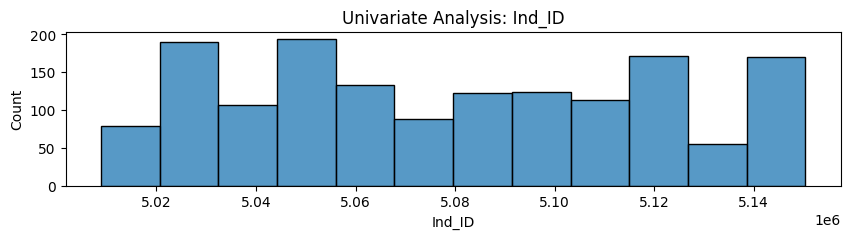

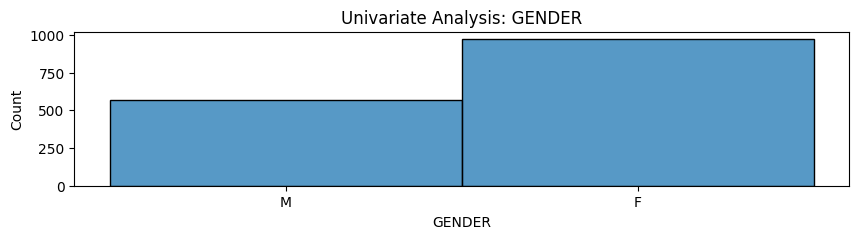

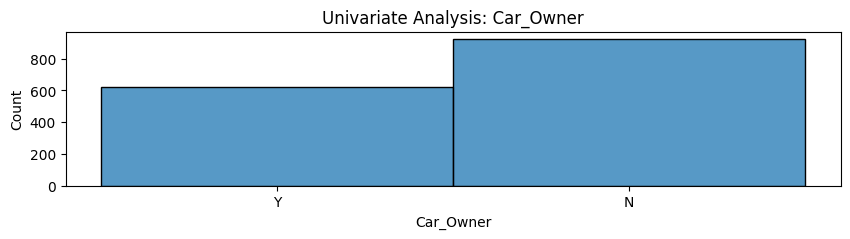

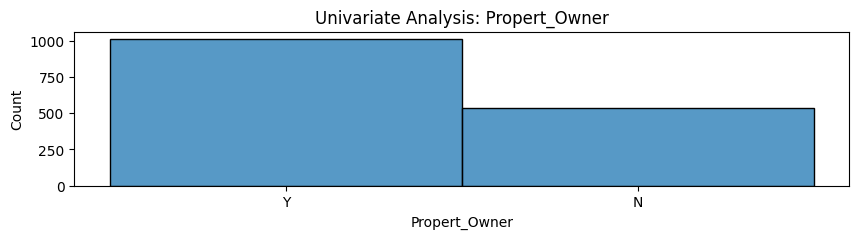

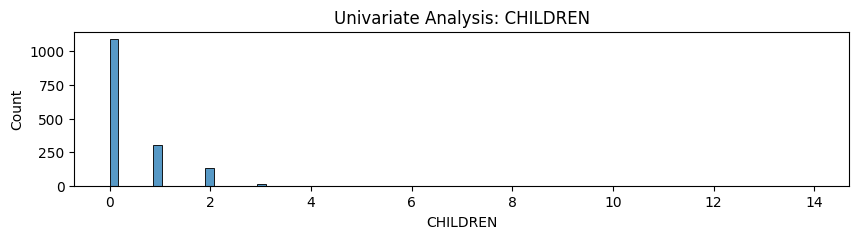

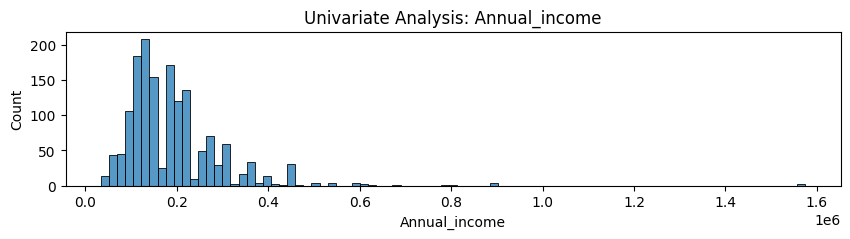

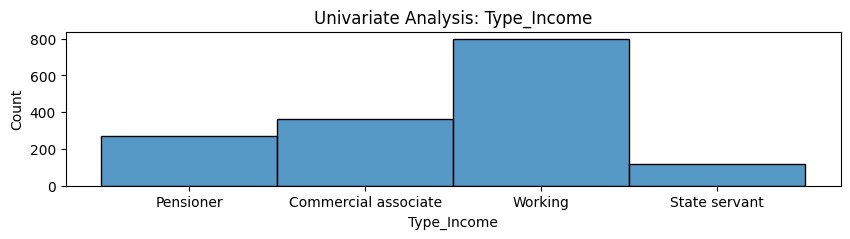

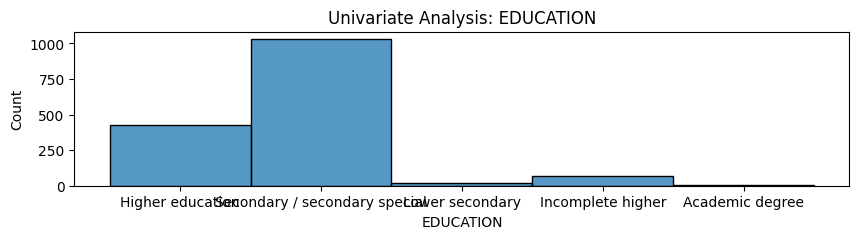

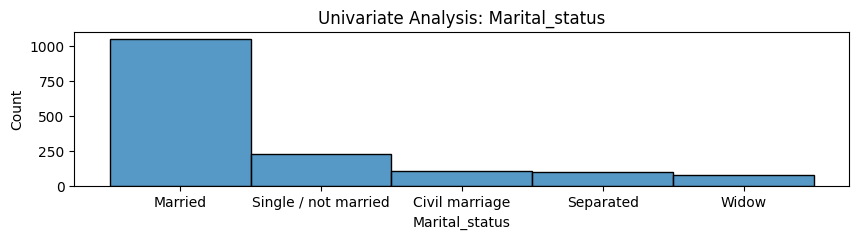

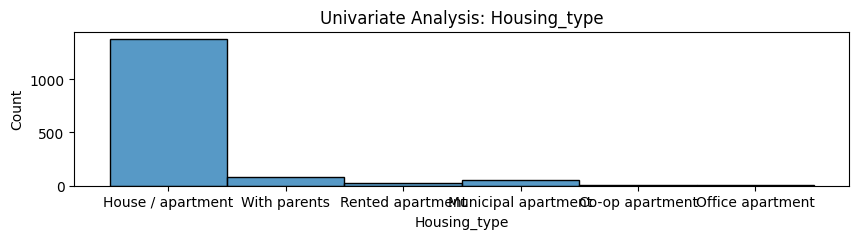

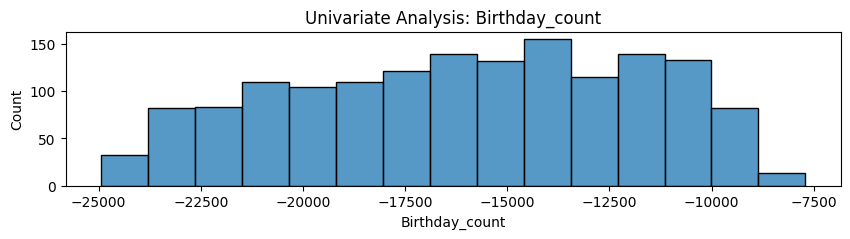

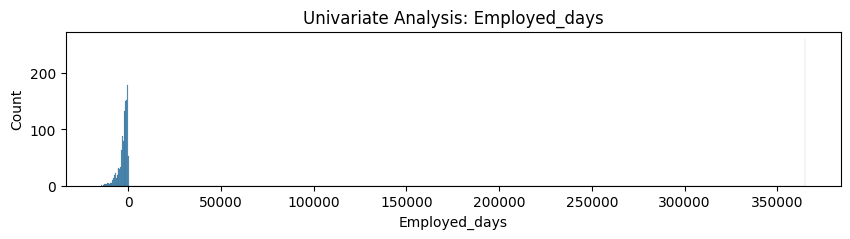

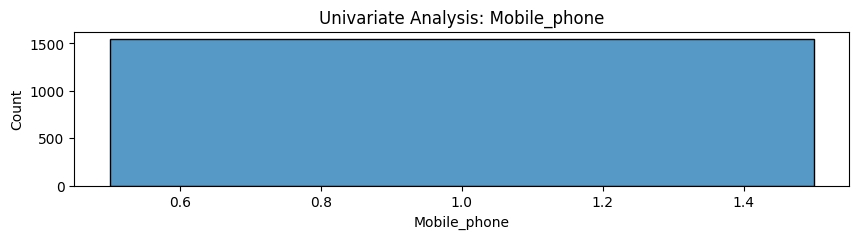

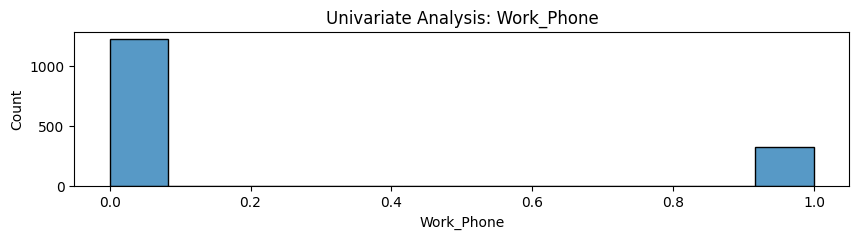

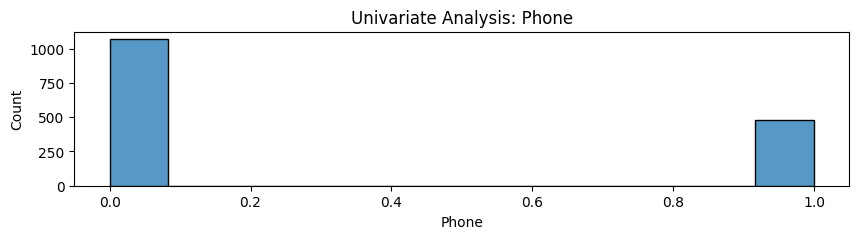

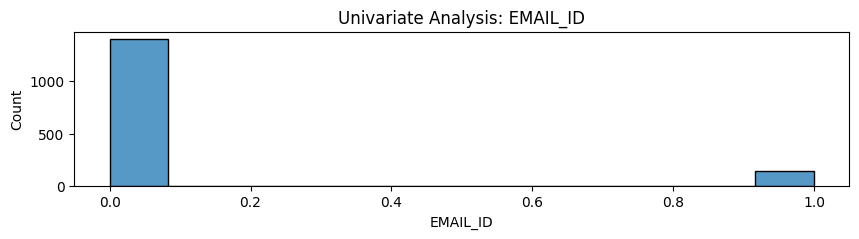

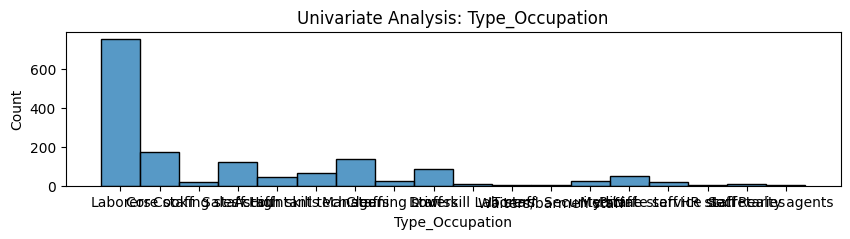

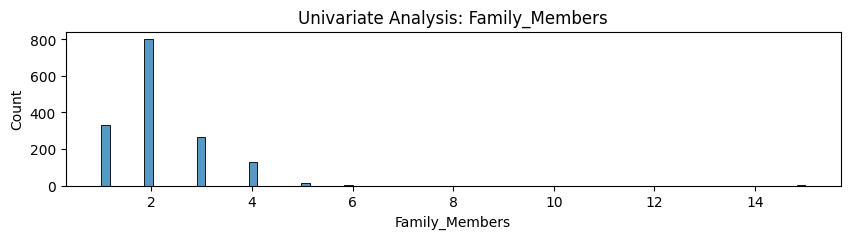

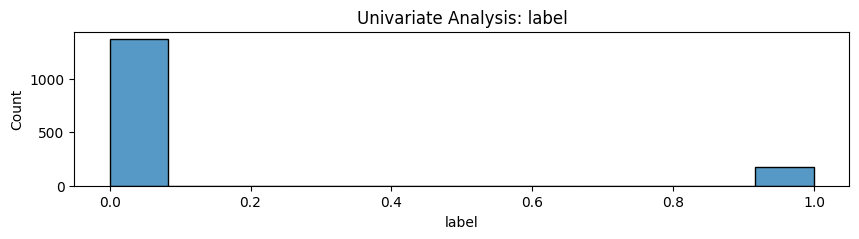

In [ ]:
for column in cc.columns:
    plt.figure(figsize=(10,2))
    sns.histplot(cc[column])
    plt.title(f'Univariate Analysis: {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Insights:-
From the above graph we can see that,
- Most of the applicants are Females.
- Most of the applicant's do not own car but most of applicant's own property.
- More than 1000 applicants do not have Children.
- We can see in annual income histogram, the graph is right skewed, which implies most of the applicants are present towards right of the peak. The peak is pointed at approximately 0.12.
- From the above histogram, we can see that most of the applicant's source of income is through working.
- We can see that most of the applicant's education level is secondary/secondary special.
- Most of the applicants are Married.
- Most of the applicants owns house or apartments.
- the Birthday count values are normally distributed.
- Many of the Applicants have lesser employed Days.
- Each and Every applicants has mobile phone.
- Most of the Applicants Do not have Work phones.
- Only few of the applicants have E-Mail ID's.
- Most of the applicants are labourers by Occupation.
- Most of the applicants have two members in their Family.
- Most of the applicant's credit card is approved.



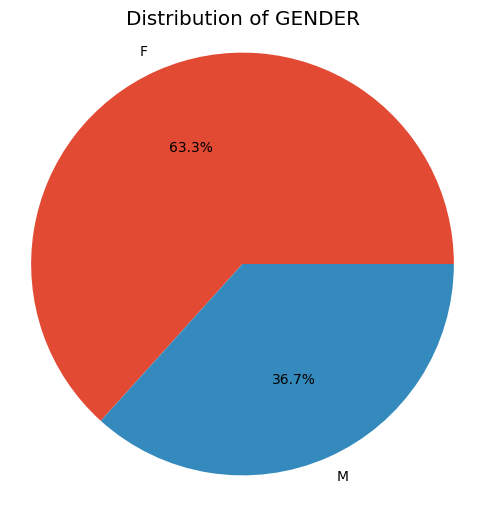

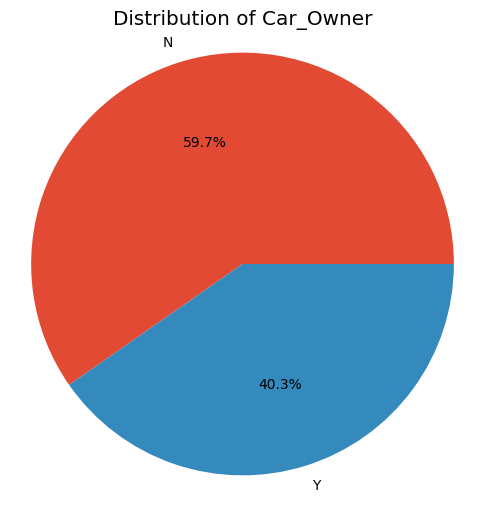

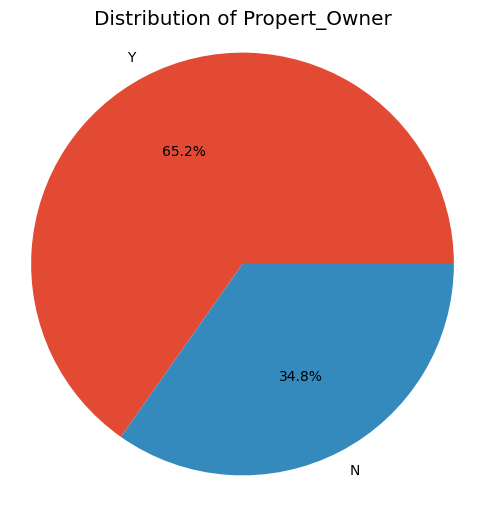

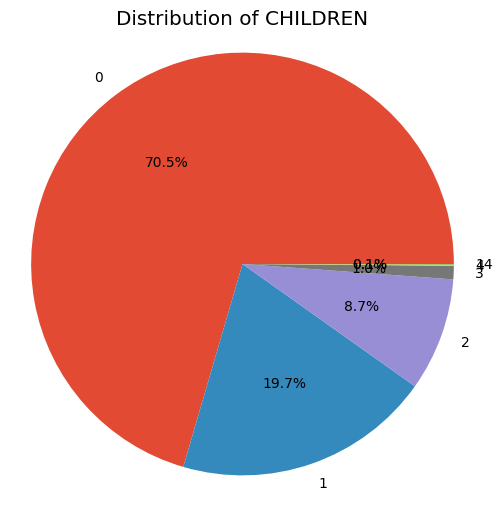

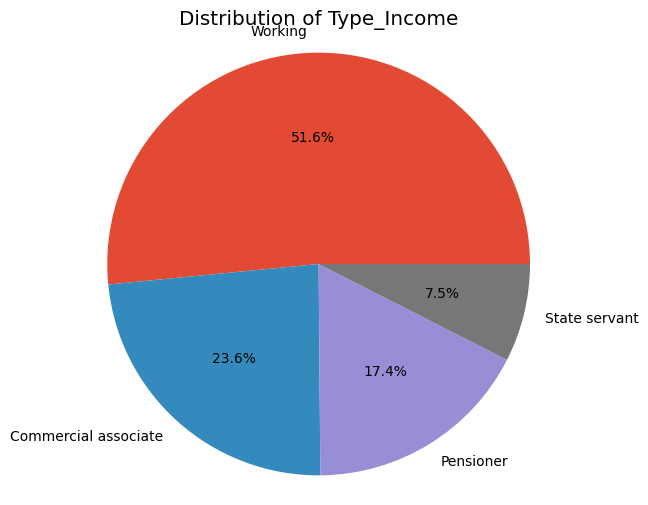

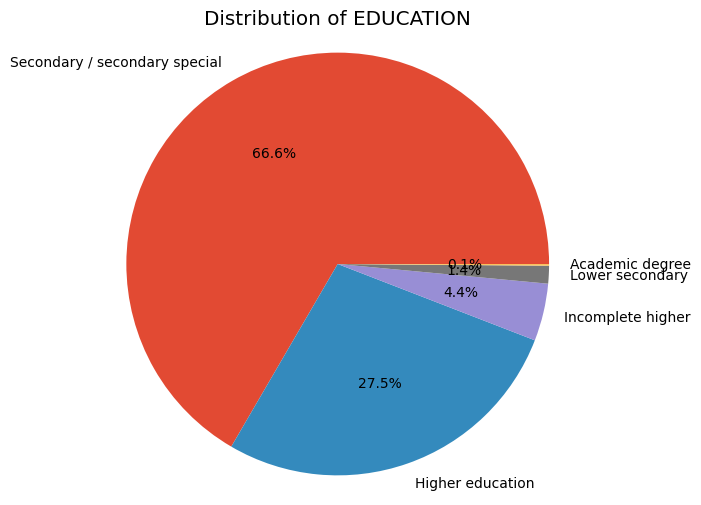

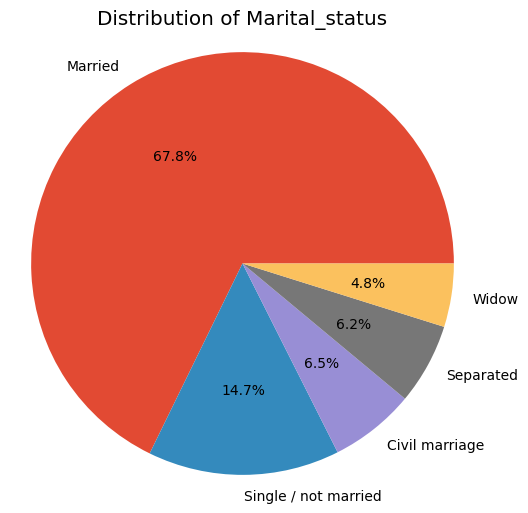

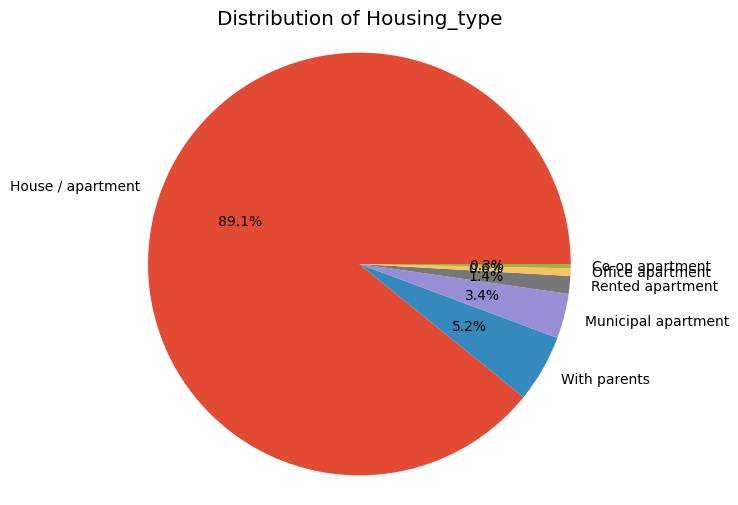

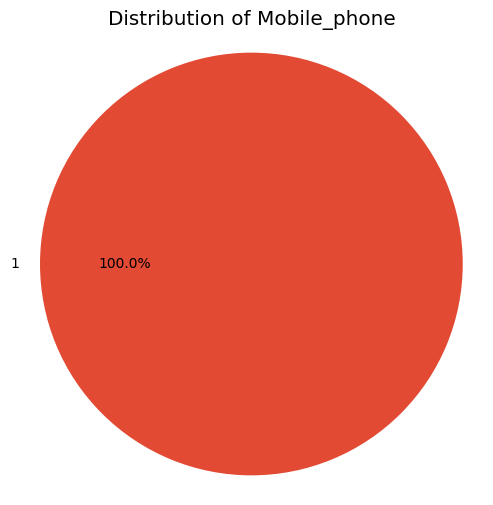

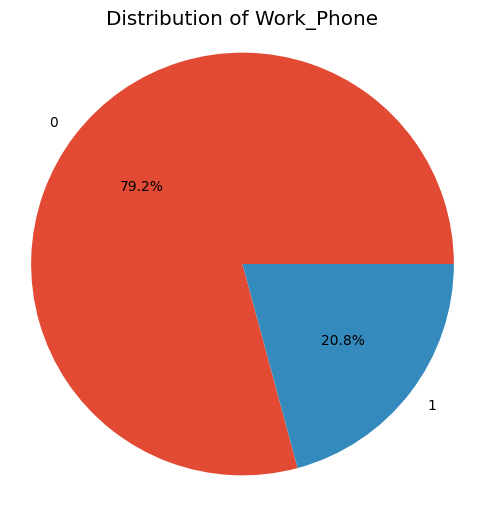

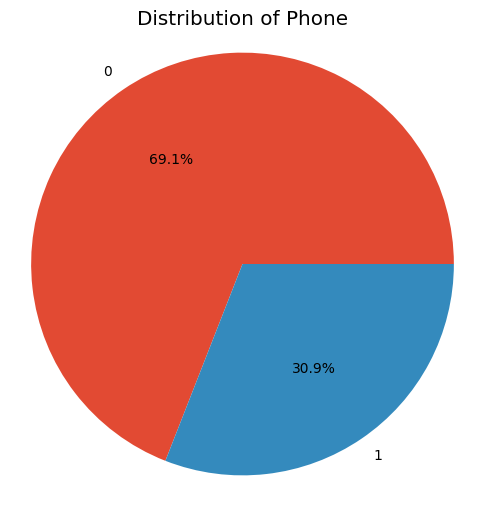

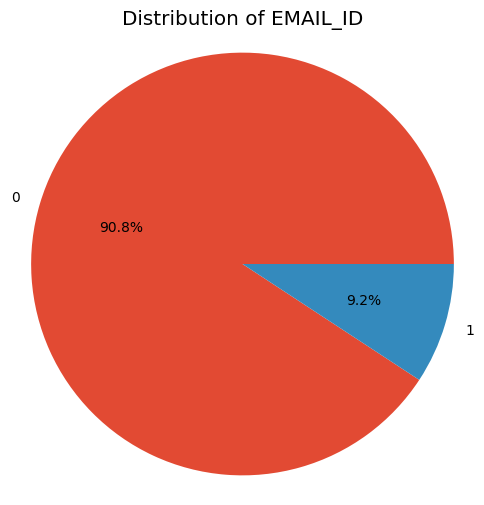

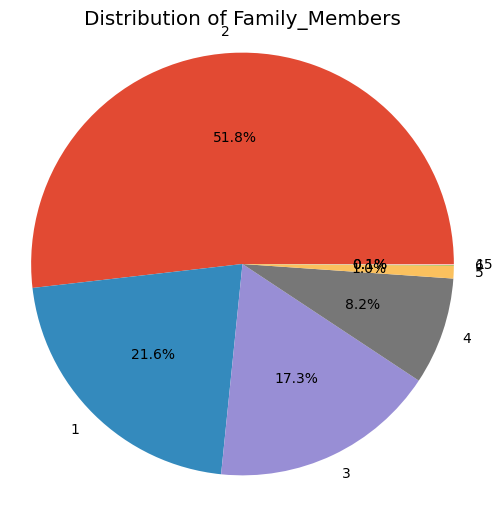

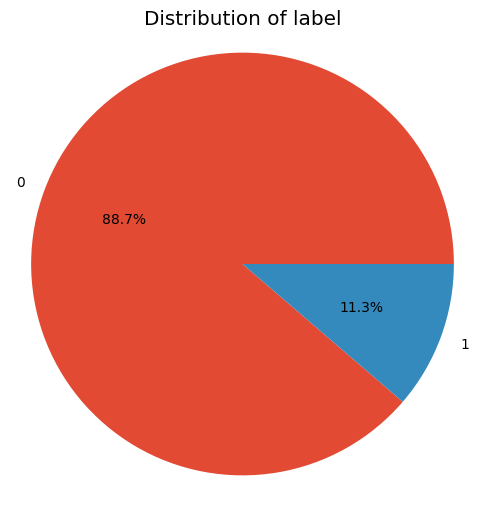

In [ ]:
columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label']

for column in columns:

    category_counts = cc[column].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {column}')
    plt.axis('equal')
    plt.show()


Insights:-
- nearly 63.3% of applicants are females and 36.7% of applicants are males.
- 40.3% of the applicants own car and 59.7% of the applicants do not own car.
- nearly 65.2% of the applicants own property and 34.8% of the applicants do not own property.
- Majorly 70.5% of the applicants do not have children.
- Approximately more than 50% of the applicant's income is through working.
- Approximately 10% of the applicants do not own house/apartments.


Bivariate Analysis
- Correlation
- Scatter plot
- Pair plot

<ipython-input-26-8507fb91683a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=cc.corr()


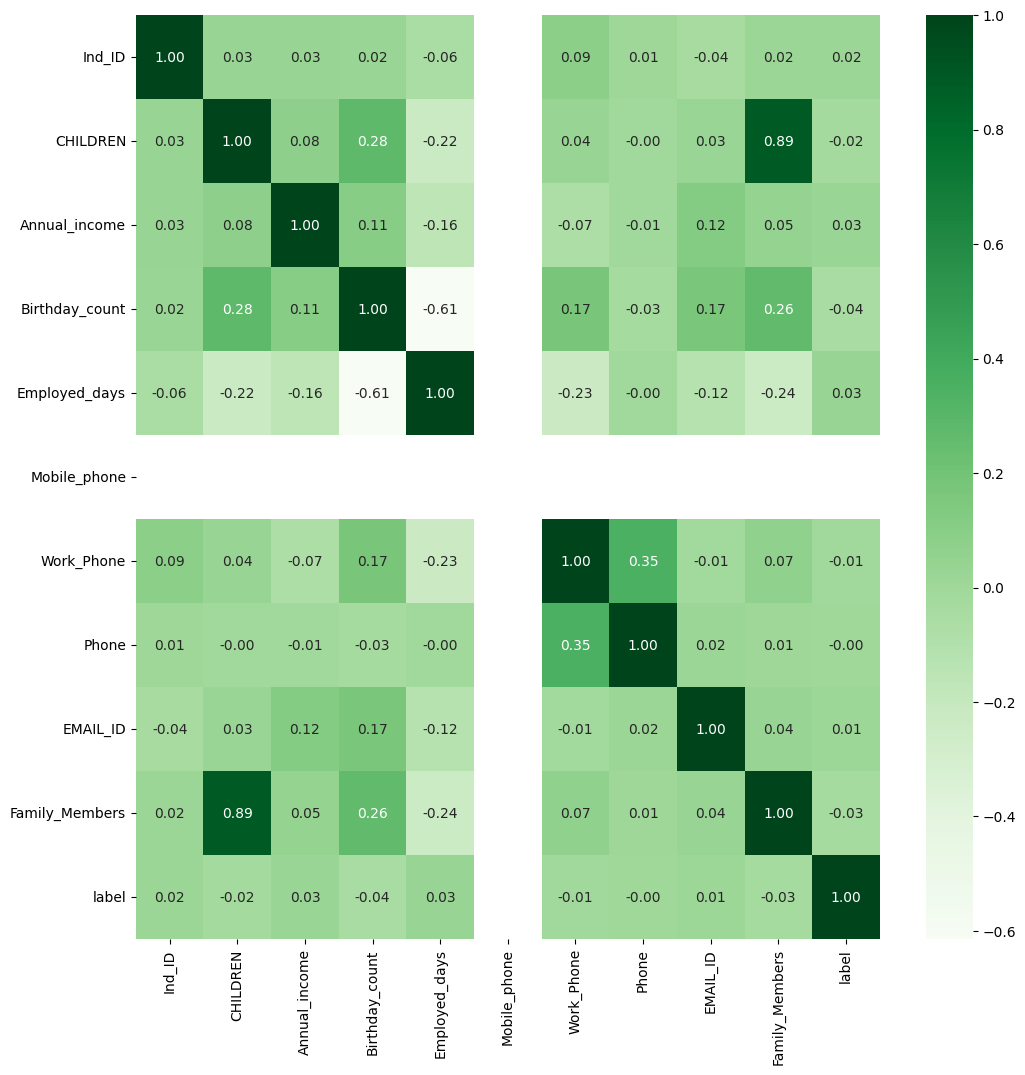

In [ ]:
corr_df=cc.corr()

plt.figure(figsize = (12,12))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

Insights:-
- Family member and children column are highly correlated.
- Annual income and Employed days columns are more correlated than any other columns.

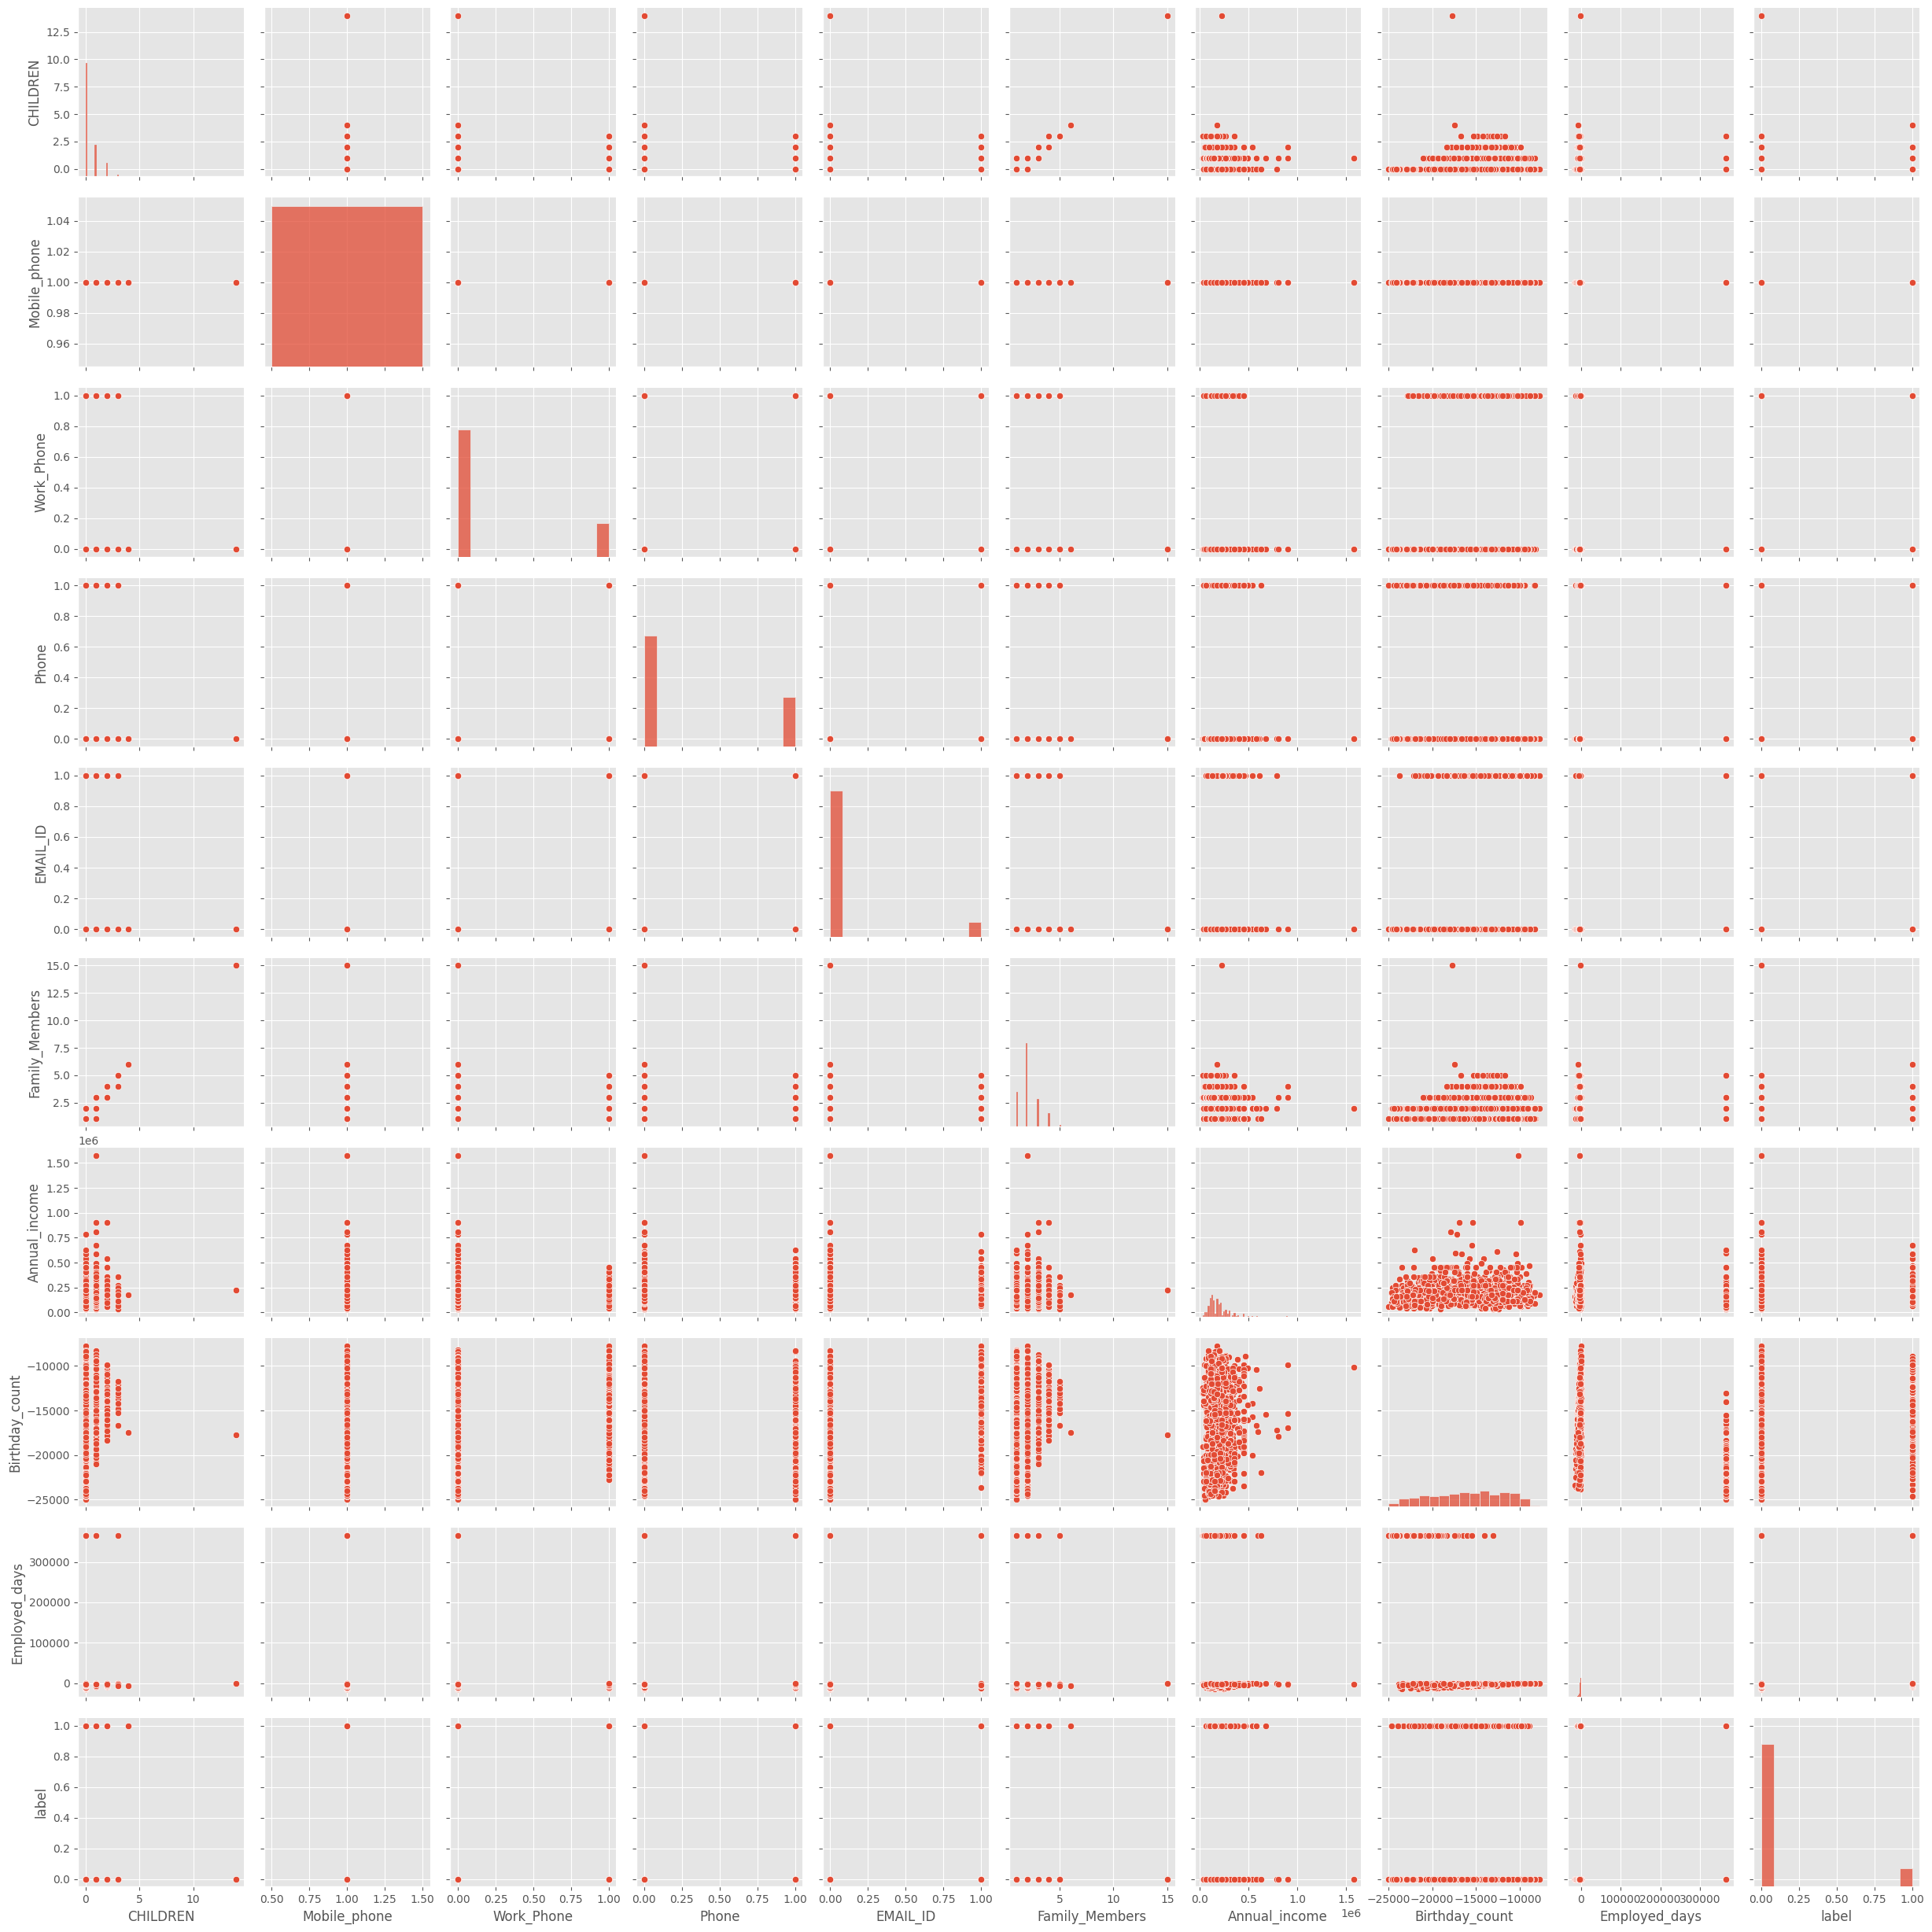

In [ ]:
columns = ['GENDER', 'Car_Owner','Propert_Owner','CHILDREN','Type_Income','EDUCATION','Marital_status','Housing_type','Mobile_phone','Work_Phone','Phone','EMAIL_ID','Family_Members','Annual_income','Birthday_count', 'Employed_days' ,'Type_Occupation','label']
sns.pairplot(cc[columns])

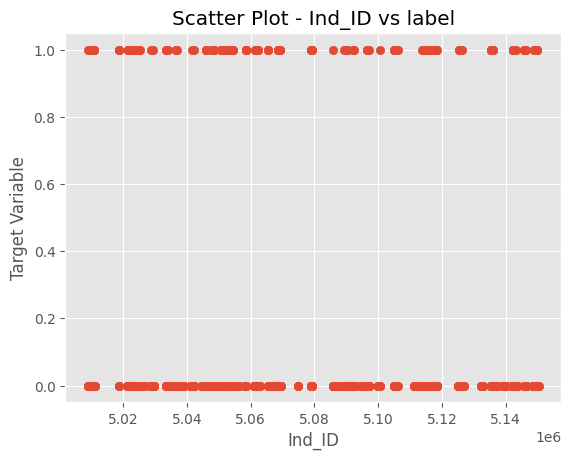

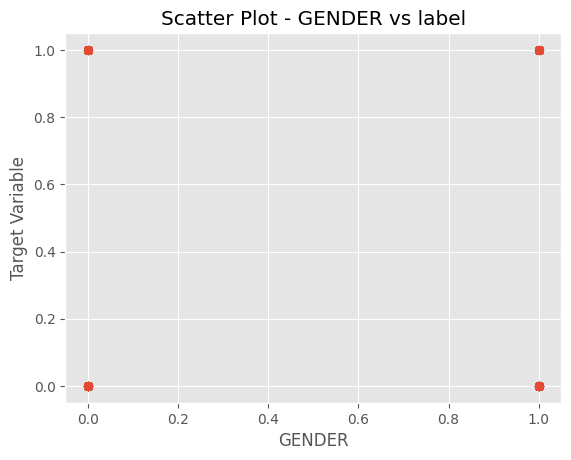

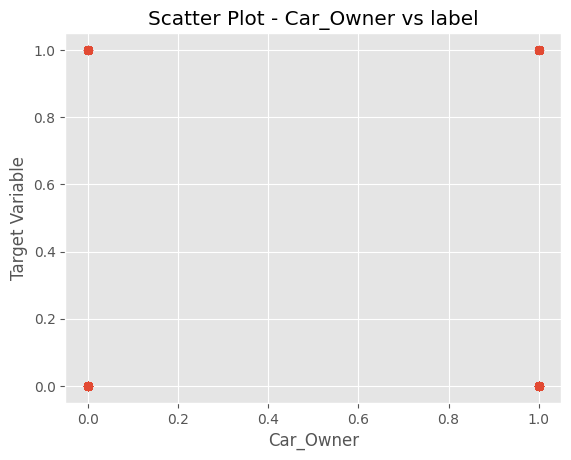

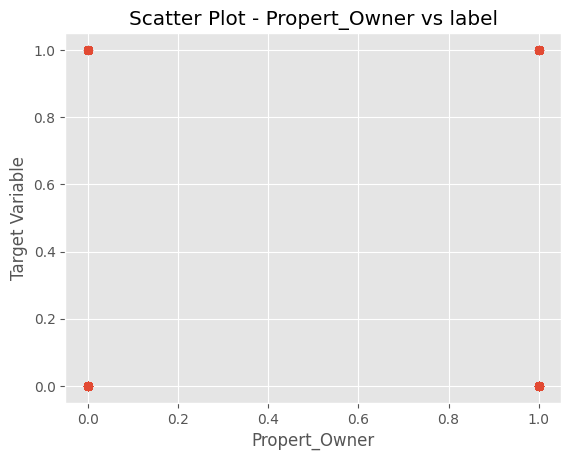

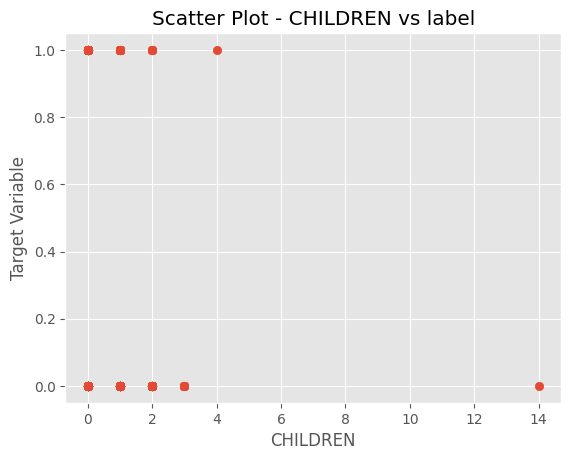

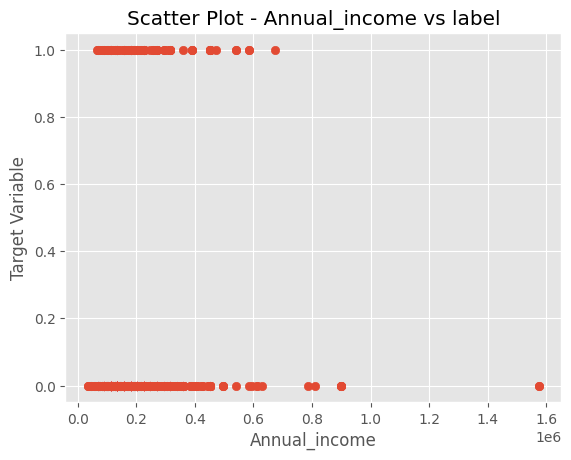

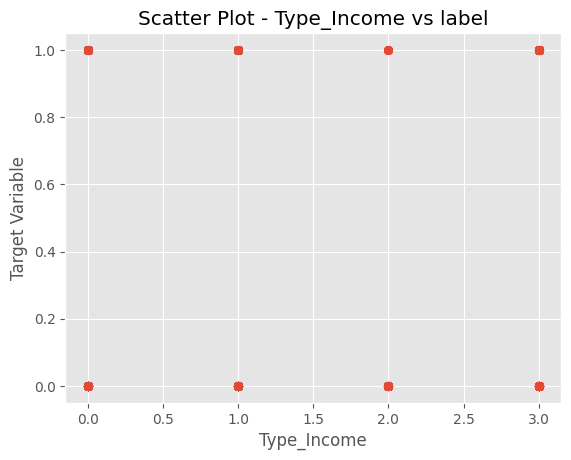

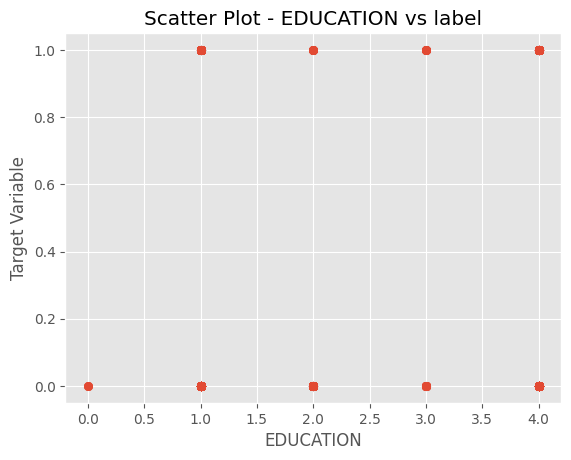

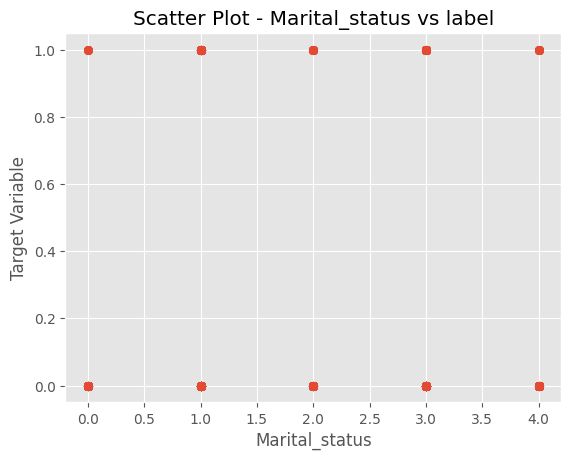

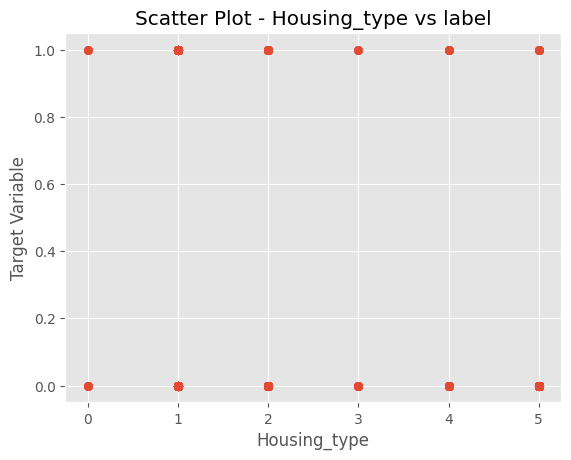

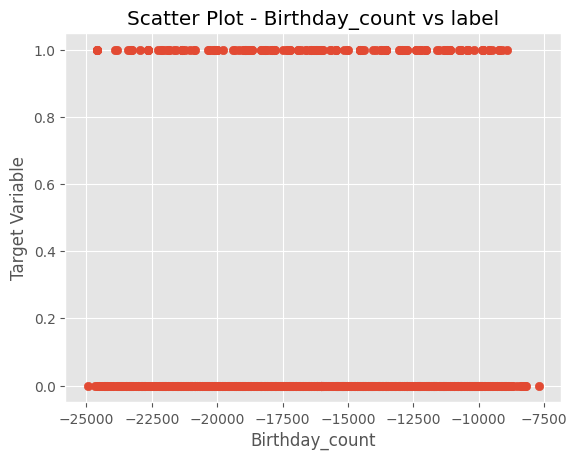

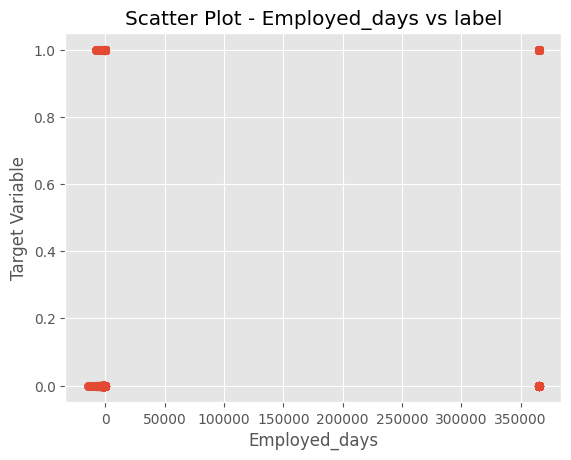

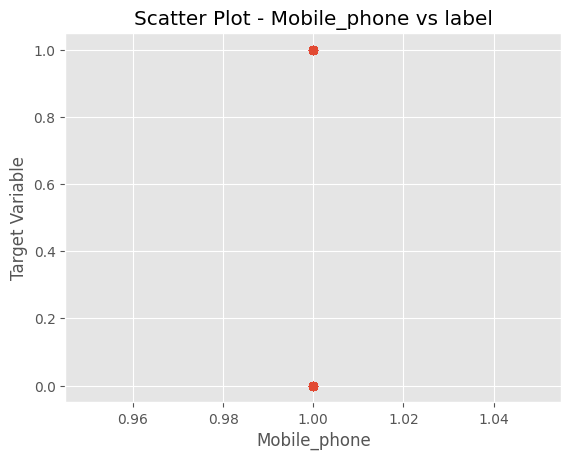

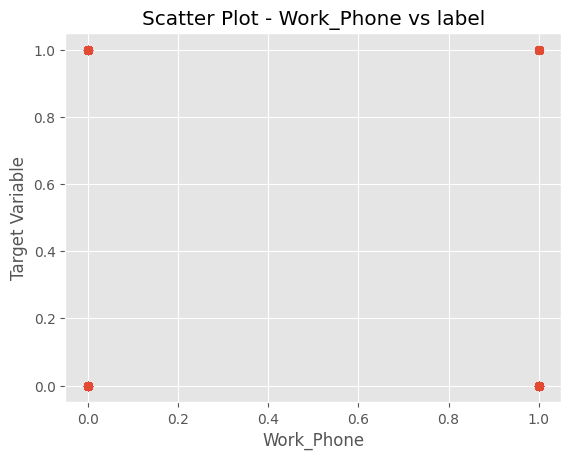

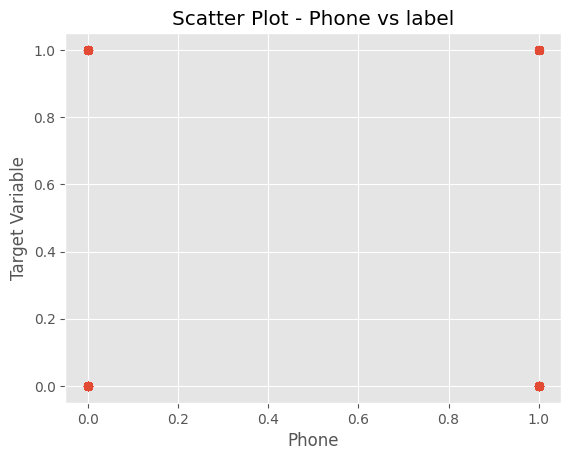

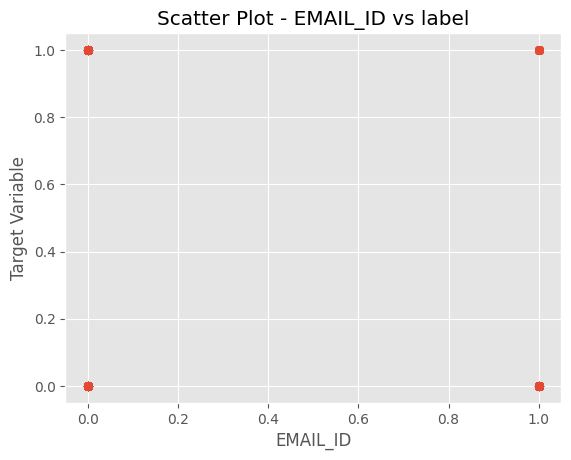

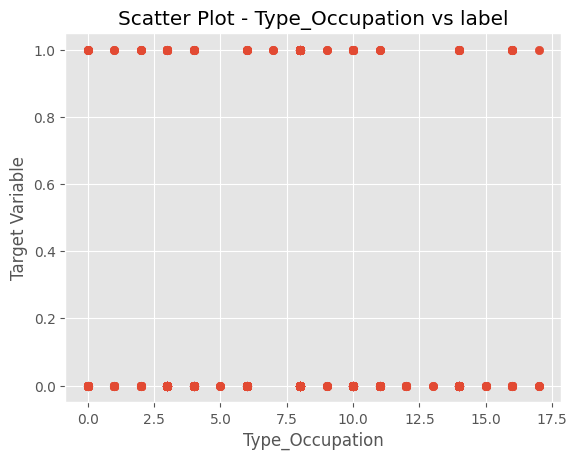

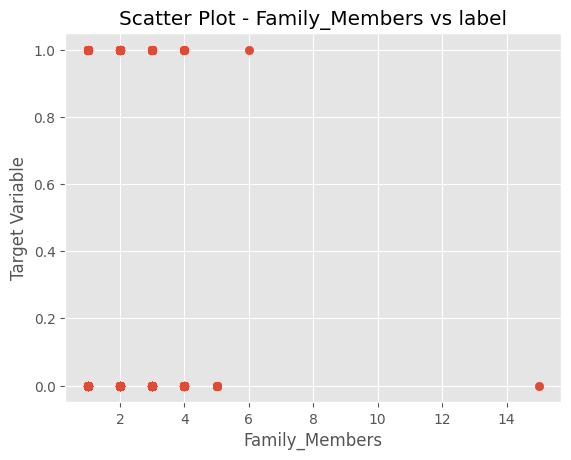

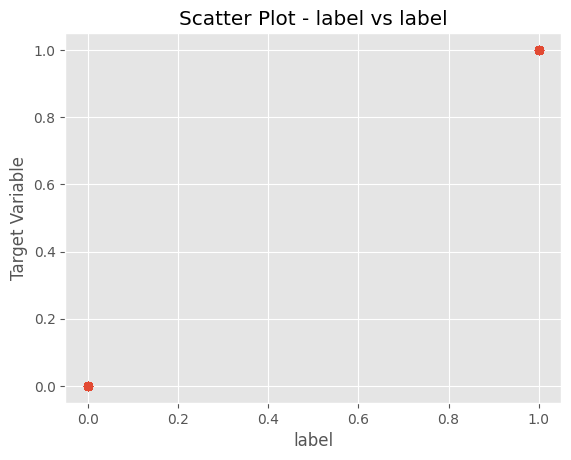

In [ ]:
target=['label']
for column in cc.columns:
    # Create a scatter plot between the target variable and the current column

    plt.figure()
    plt.scatter(cc[column], cc['label'])
    plt.xlabel(column)
    plt.ylabel('Target Variable')
    plt.title(f'Scatter Plot - {column} vs label')
    plt.show()

#### Bar Graph Showing stacked variations of gender column with label column

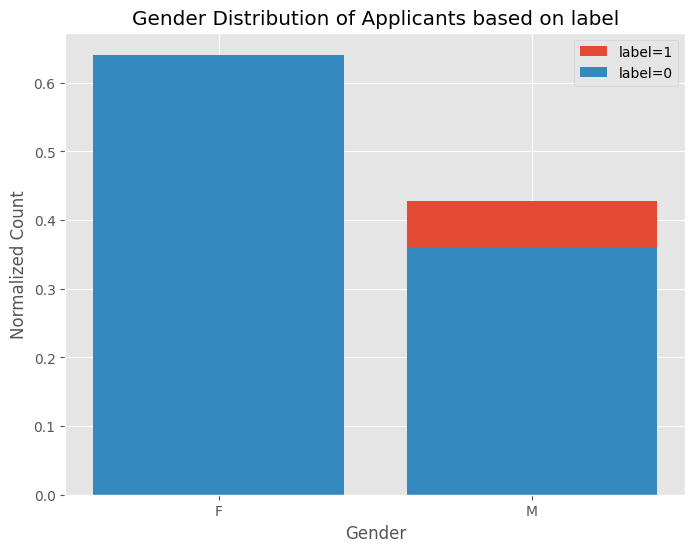

In [ ]:
gender_column = 'GENDER'
target = 'label'

categories = cc[target].unique()

plt.figure(figsize=(8, 6))
for category in categories:
    filtered_data = cc[cc[target] == category]
    gender_counts = filtered_data[gender_column].value_counts(normalize=True)
    plt.bar(gender_counts.index, gender_counts.values, label=f'{target}={category}')

plt.xlabel('Gender')
plt.ylabel('Normalized Count')
plt.title('Gender Distribution of Applicants based on label')
plt.legend()
plt.show()


Insights:-
- From the above bar chart, we can conclude that every female applicant's credit card is approved.
- Few of the male applicant's are not approved.

#### Bar Chart on Education Level of Applicants

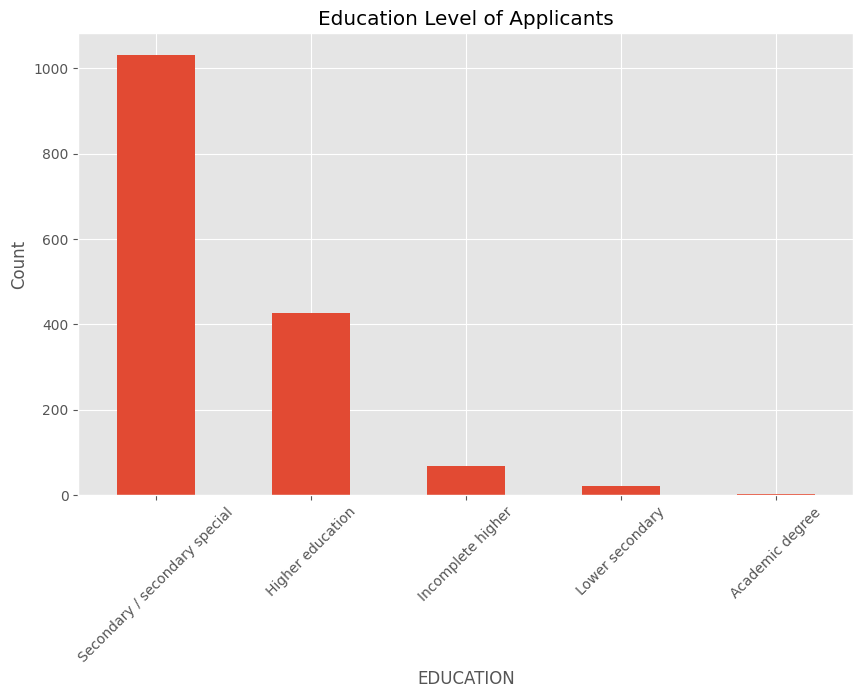

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

education_counts = cc['EDUCATION'].value_counts()

plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.title('Education Level of Applicants')
plt.xticks(rotation=45)
plt.show()


Insights:-
- From the graph above, we can conclude that most of applicants have secondary/secondary special level of education, which is followed Higher education
- Remaining applicants contribution towards education level are minimal or negligible



## Feauture Engineering

#### Imputation

Changing the categorical variables into numerical columns

label encoding :-

- GENDER
- Car_Owner
- Propert_Owner
- Type_Income
- EDUCATION
- Marital_Status
- Housing_Type
- Type_Occupation


In [ ]:
from sklearn.preprocessing import LabelEncoder

columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

encoder = LabelEncoder()

for column in columns:
    if column in cc.columns:
        cc[column] = encoder.fit_transform(cc[column])
print(cc)


       Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       1          1              1         0   180000.00000   
1     5009744       0          1              0         0   315000.00000   
2     5009746       0          1              0         0   315000.00000   
3     5009749       0          1              0         0   191399.32623   
4     5009752       0          1              0         0   315000.00000   
...       ...     ...        ...            ...       ...            ...   
1543  5028645       0          0              1         0   191399.32623   
1544  5023655       0          0              0         0   225000.00000   
1545  5115992       1          1              1         2   180000.00000   
1546  5118219       1          1              0         0   270000.00000   
1547  5053790       0          1              1         0   225000.00000   

      Type_Income  EDUCATION  Marital_status  Housing_type  Birthday_count  \
0        

In [ ]:
cc


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.00000,1,1,1,1,-18772.000000,365243,1,0,0,0,8,2,1
1,5009744,0,1,0,0,315000.00000,0,1,1,1,-13557.000000,-586,1,1,1,0,8,2,1
2,5009746,0,1,0,0,315000.00000,0,1,1,1,-16040.342071,-586,1,1,1,0,8,2,1
3,5009749,0,1,0,0,191399.32623,0,1,1,1,-13557.000000,-586,1,1,1,0,8,2,1
4,5009752,0,1,0,0,315000.00000,0,1,1,1,-13557.000000,-586,1,1,1,0,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,191399.32623,0,1,1,1,-11957.000000,-2182,1,0,0,0,10,2,0
1544,5023655,0,0,0,0,225000.00000,0,2,3,1,-10229.000000,-1209,1,0,0,0,0,1,0
1545,5115992,1,1,1,2,180000.00000,3,1,1,1,-13174.000000,-2477,1,0,0,0,10,4,0
1546,5118219,1,1,0,0,270000.00000,3,4,0,1,-15292.000000,-645,1,1,1,0,4,2,0


SCALING

we use standard scalar here for independent variables.

In [ ]:
from sklearn.preprocessing import StandardScaler

target_variable = cc['label']

features = cc.drop('label', axis=1)

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

cc = pd.DataFrame(scaled_features, columns=features.columns)
cc['label'] = target_variable

In [ ]:
cc

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,-1.680730,1.313527,1.216869,0.729845,-0.531645,-1.014431e-01,-0.684595,-1.533725,-0.444310,-0.30149,-0.650710,2.220314,0.0,-0.512487,-0.669390,-0.319029,0.081399,-0.170453,1
1,-1.658742,-0.761309,1.216869,-1.370155,-0.531645,1.099928e+00,-1.471346,-1.533725,-0.444310,-0.30149,0.591559,-0.435171,0.0,1.951270,1.493899,-0.319029,0.081399,-0.170453,1
2,-1.658694,-0.761309,1.216869,-1.370155,-0.531645,1.099928e+00,-1.471346,-1.533725,-0.444310,-0.30149,0.000000,-0.435171,0.0,1.951270,1.493899,-0.319029,0.081399,-0.170453,1
3,-1.658622,-0.761309,1.216869,-1.370155,-0.531645,-2.589962e-16,-1.471346,-1.533725,-0.444310,-0.30149,0.591559,-0.435171,0.0,1.951270,1.493899,-0.319029,0.081399,-0.170453,1
4,-1.658550,-0.761309,1.216869,-1.370155,-0.531645,1.099928e+00,-1.471346,-1.533725,-0.444310,-0.30149,0.591559,-0.435171,0.0,1.951270,1.493899,-0.319029,0.081399,-0.170453,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,-1.205525,-0.761309,-0.821781,0.729845,-0.531645,-2.589962e-16,-1.471346,-1.533725,-0.444310,-0.30149,0.972696,-0.446756,0.0,-0.512487,-0.669390,-0.319029,0.656770,-0.170453,0
1544,-1.325178,-0.761309,-0.821781,-1.370155,-0.531645,2.990138e-01,-1.471346,-0.792017,1.596616,-0.30149,1.384324,-0.439693,0.0,-0.512487,-0.669390,-0.319029,-2.220082,-1.225901,0
1545,0.888921,1.313527,1.216869,0.729845,2.044213,-1.014431e-01,0.888906,-1.533725,-0.444310,-0.30149,0.682793,-0.448897,0.0,-0.512487,-0.669390,-0.319029,0.656770,1.940442,0
1546,0.942321,1.313527,1.216869,-1.370155,-0.531645,6.994707e-01,0.888906,0.691398,-1.464773,-0.30149,0.178263,-0.435599,0.0,1.951270,1.493899,-0.319029,-1.069341,-0.170453,0


Train/Test data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = cc[['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'Annual_income', 'Birthday_count', 'Employed_days', 'Type_Occupation']]
y = cc['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Annual_income,Birthday_count,Employed_days,Type_Occupation
730,-0.761309,-0.821781,0.729845,-0.531645,0.888906,0.691398,0.576153,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-1.225901,-0.501900,0.304991,-0.440463,0.081399
100,1.313527,-0.821781,-1.370155,0.756284,0.102156,0.691398,-0.444310,0.737946,0.0,-0.512487,-0.669390,-0.319029,0.884994,-0.942403,0.244486,-0.480756,-1.357026
619,-0.761309,-0.821781,-1.370155,0.756284,0.888906,0.691398,-1.464773,-0.301490,0.0,1.951270,-0.669390,-0.319029,0.884994,-0.942403,1.387182,-0.437450,-2.220082
838,1.313527,-0.821781,-1.370155,-0.531645,0.102156,0.691398,-0.444310,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-1.102585,1.044873,-0.451373,0.081399
1419,-0.761309,-0.821781,-1.370155,-0.531645,-0.684595,0.691398,0.576153,0.737946,0.0,-0.512487,-0.669390,-0.319029,-1.225901,-0.702128,-1.331278,2.220314,0.081399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-0.761309,-0.821781,-1.370155,-0.531645,-1.471346,-1.533725,-0.444310,-0.301490,0.0,1.951270,1.493899,3.134513,-0.170453,1.099928,-0.035174,-0.433160,1.807510
1294,1.313527,1.216869,0.729845,0.756284,0.888906,0.691398,-0.444310,-0.301490,0.0,1.951270,-0.669390,-0.319029,0.884994,0.098785,1.386944,-0.433189,0.081399
860,1.313527,1.216869,-1.370155,2.044213,0.888906,0.691398,-0.444310,-0.301490,0.0,-0.512487,1.493899,-0.319029,1.940442,-0.702128,0.701612,-0.432492,0.081399
1459,-0.761309,-0.821781,0.729845,-0.531645,0.888906,-1.533725,-0.444310,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-0.181534,-0.549709,-0.458885,-0.493971


In [ ]:
y_train

730     0
100     1
619     0
838     0
1419    0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: label, Length: 1083, dtype: int64

In [ ]:
X_train

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Annual_income,Birthday_count,Employed_days,Type_Occupation
730,-0.761309,-0.821781,0.729845,-0.531645,0.888906,0.691398,0.576153,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-1.225901,-0.501900,0.304991,-0.440463,0.081399
100,1.313527,-0.821781,-1.370155,0.756284,0.102156,0.691398,-0.444310,0.737946,0.0,-0.512487,-0.669390,-0.319029,0.884994,-0.942403,0.244486,-0.480756,-1.357026
619,-0.761309,-0.821781,-1.370155,0.756284,0.888906,0.691398,-1.464773,-0.301490,0.0,1.951270,-0.669390,-0.319029,0.884994,-0.942403,1.387182,-0.437450,-2.220082
838,1.313527,-0.821781,-1.370155,-0.531645,0.102156,0.691398,-0.444310,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-1.102585,1.044873,-0.451373,0.081399
1419,-0.761309,-0.821781,-1.370155,-0.531645,-0.684595,0.691398,0.576153,0.737946,0.0,-0.512487,-0.669390,-0.319029,-1.225901,-0.702128,-1.331278,2.220314,0.081399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-0.761309,-0.821781,-1.370155,-0.531645,-1.471346,-1.533725,-0.444310,-0.301490,0.0,1.951270,1.493899,3.134513,-0.170453,1.099928,-0.035174,-0.433160,1.807510
1294,1.313527,1.216869,0.729845,0.756284,0.888906,0.691398,-0.444310,-0.301490,0.0,1.951270,-0.669390,-0.319029,0.884994,0.098785,1.386944,-0.433189,0.081399
860,1.313527,1.216869,-1.370155,2.044213,0.888906,0.691398,-0.444310,-0.301490,0.0,-0.512487,1.493899,-0.319029,1.940442,-0.702128,0.701612,-0.432492,0.081399
1459,-0.761309,-0.821781,0.729845,-0.531645,0.888906,-1.533725,-0.444310,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-0.181534,-0.549709,-0.458885,-0.493971


In [ ]:
y_test

30      1
1514    0
1182    0
1205    0
528     0
       ..
312     0
978     0
892     0
109     1
952     0
Name: label, Length: 465, dtype: int64

## Machine Learning

#### Building Algorithms

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

LogisticRegression()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

forest_model = RandomForestClassifier()

forest_model.fit(X_train, y_train)

RandomForestClassifier()

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

#### Predictions

logistic Regression

In [ ]:
lr_pred = logistic_model.predict(X_test)

KNN

In [ ]:
knn_pred = knn_model.predict(X_test)

Decision Tree

In [ ]:
dt_pred = tree_model.predict(X_test)

Random Forest

In [ ]:
rf_pred = forest_model.predict(X_test)

SVM

In [ ]:
svm_pred = svm_model.predict(X_test)

#### Evaluating the predictions

logistic Regression

In [ ]:
from sklearn.metrics import precision_score, confusion_matrix, classification_report

In [ ]:
accuracy_lr = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy_lr)


Accuracy: 0.9075268817204301


In [ ]:
lr_precision = precision_score(y_test, lr_pred,zero_division=0)
print("Precision Score",lr_precision)

Precision Score 0.0


In [ ]:
lr_confusion_matrix = confusion_matrix(y_test, lr_pred)
print("Score Of Confusion Matrix",lr_confusion_matrix)

Score Of Confusion Matrix [[422   0]
 [ 43   0]]


In [ ]:
lr_classification_report = classification_report(y_test, lr_pred,zero_division=0)
print("Score Of Classification report",lr_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



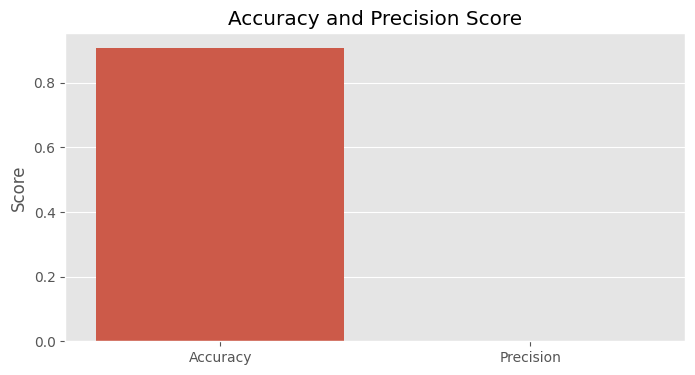

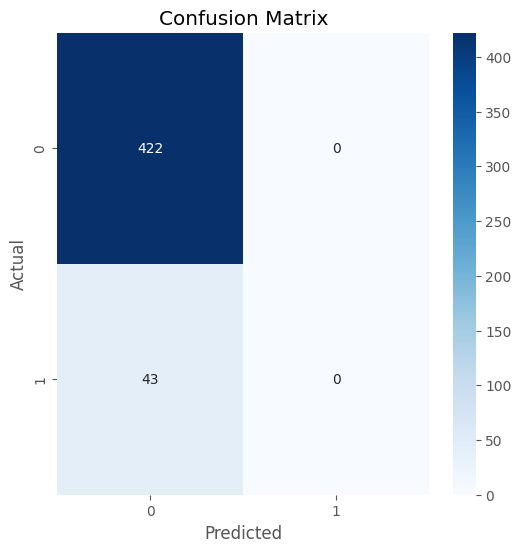

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



In [ ]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_lr, 'Precision': lr_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(lr_classification_report)

KNN


In [ ]:
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.8924731182795699


In [ ]:
knn_precision = precision_score(y_test, knn_pred,zero_division=0)
print("Precision Score",knn_precision)

knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
print("Score Of Confusion Matrix",knn_confusion_matrix)

knn_classification_report = classification_report(y_test, knn_pred,zero_division=0)
print("Score Of Classification report",knn_classification_report)

Precision Score 0.18181818181818182
Score Of Confusion Matrix [[413   9]
 [ 41   2]]
Score Of Classification report               precision    recall  f1-score   support

           0       0.91      0.98      0.94       422
           1       0.18      0.05      0.07        43

    accuracy                           0.89       465
   macro avg       0.55      0.51      0.51       465
weighted avg       0.84      0.89      0.86       465



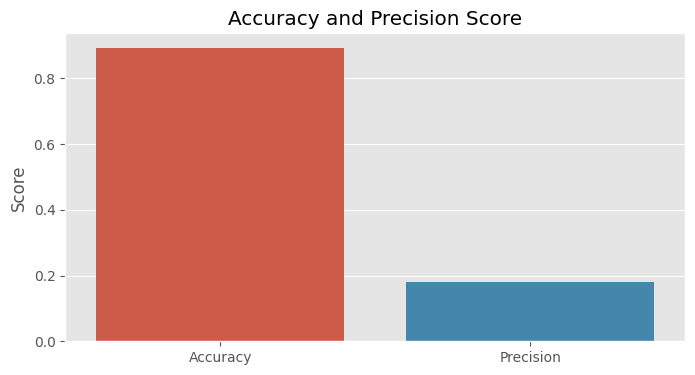

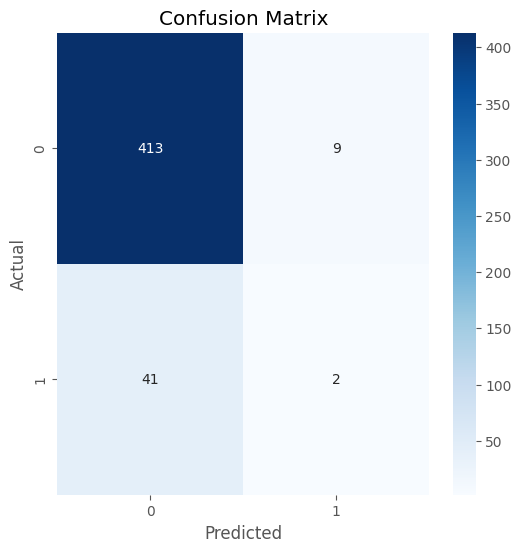

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       422
           1       0.18      0.05      0.07        43

    accuracy                           0.89       465
   macro avg       0.55      0.51      0.51       465
weighted avg       0.84      0.89      0.86       465



In [ ]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_knn, 'Precision': knn_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(knn_classification_report)

Decision Tree

In [ ]:
accuracy_dt = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy_dt)

Accuracy: 0.864516129032258


In [ ]:
dt_precision = precision_score(y_test, dt_pred,zero_division=0)
print("Precision Score",dt_precision)

dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
print("Score Of Confusion Matrix",dt_confusion_matrix)

dt_classification_report = classification_report(y_test, dt_pred,zero_division=0)
print("Score Of Classification report",dt_classification_report)

Precision Score 0.3148148148148148
Score Of Confusion Matrix [[385  37]
 [ 26  17]]
Score Of Classification report               precision    recall  f1-score   support

           0       0.94      0.91      0.92       422
           1       0.31      0.40      0.35        43

    accuracy                           0.86       465
   macro avg       0.63      0.65      0.64       465
weighted avg       0.88      0.86      0.87       465



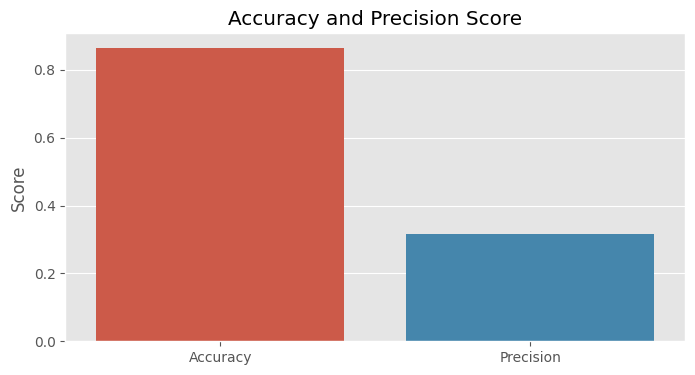

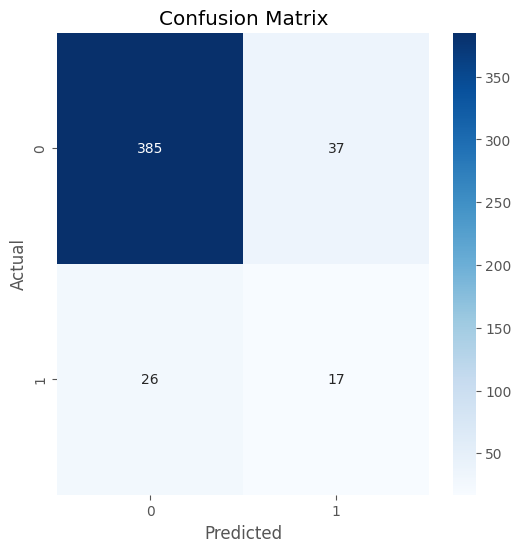

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       422
           1       0.31      0.40      0.35        43

    accuracy                           0.86       465
   macro avg       0.63      0.65      0.64       465
weighted avg       0.88      0.86      0.87       465



In [ ]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_dt, 'Precision': dt_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(dt_classification_report)

Random Forest

In [ ]:
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy_rf)

Accuracy: 0.9376344086021505


In [ ]:
rf_precision = precision_score(y_test, rf_pred,zero_division=0)
print("Precision Score",rf_precision)

rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
print("Score Of Confusion Matrix",rf_confusion_matrix)

rf_classification_report = classification_report(y_test, rf_pred,zero_division=0)
print("Score Of Classification report",rf_classification_report)

Precision Score 0.8181818181818182
Score Of Confusion Matrix [[418   4]
 [ 25  18]]
Score Of Classification report               precision    recall  f1-score   support

           0       0.94      0.99      0.97       422
           1       0.82      0.42      0.55        43

    accuracy                           0.94       465
   macro avg       0.88      0.70      0.76       465
weighted avg       0.93      0.94      0.93       465



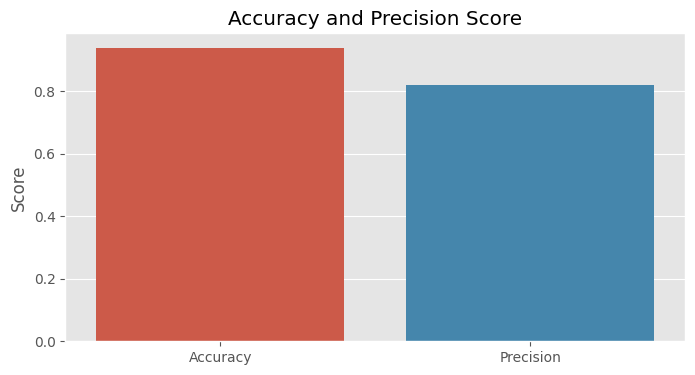

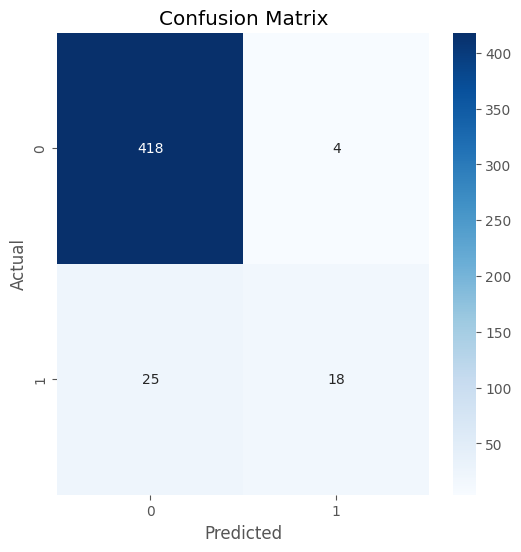

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       422
           1       0.82      0.42      0.55        43

    accuracy                           0.94       465
   macro avg       0.88      0.70      0.76       465
weighted avg       0.93      0.94      0.93       465



In [ ]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_rf, 'Precision': rf_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(rf_classification_report)

SVM

In [ ]:
accuracy_svm = accuracy_score(y_test, svm_pred)
print("Accuracy:", accuracy_svm)

Accuracy: 0.9075268817204301


In [ ]:
svm_precision = precision_score(y_test, svm_pred,zero_division=0)
print("Precision Score",svm_precision)

svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
print("Score Of Confusion Matrix",svm_confusion_matrix)

svm_classification_report = classification_report(y_test, svm_pred,zero_division=0)
print("Score Of Classification report",svm_classification_report)


Precision Score 0.0
Score Of Confusion Matrix [[422   0]
 [ 43   0]]
Score Of Classification report               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



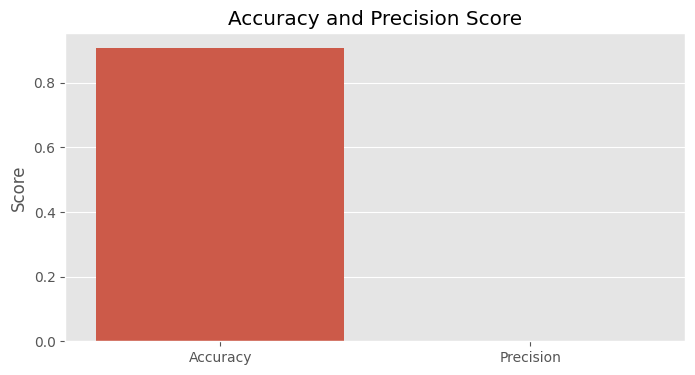

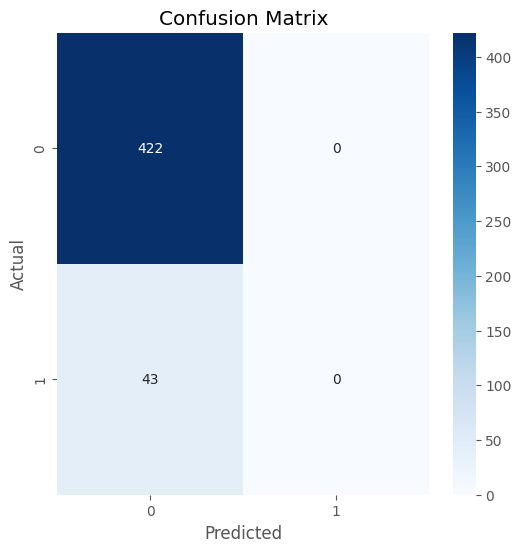

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



In [ ]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_svm, 'Precision': svm_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(svm_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(svm_classification_report)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Conclusion

Based on the evaluation, we can conclude that random forest is the best algorithm to use for this Dataset.

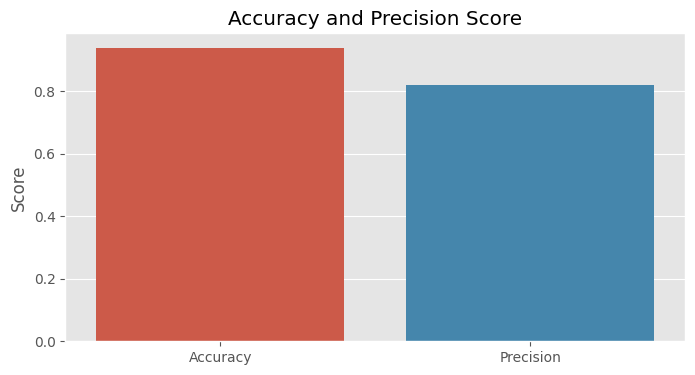

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       422
           1       0.82      0.42      0.55        43

    accuracy                           0.94       465
   macro avg       0.88      0.70      0.76       465
weighted avg       0.93      0.94      0.93       465



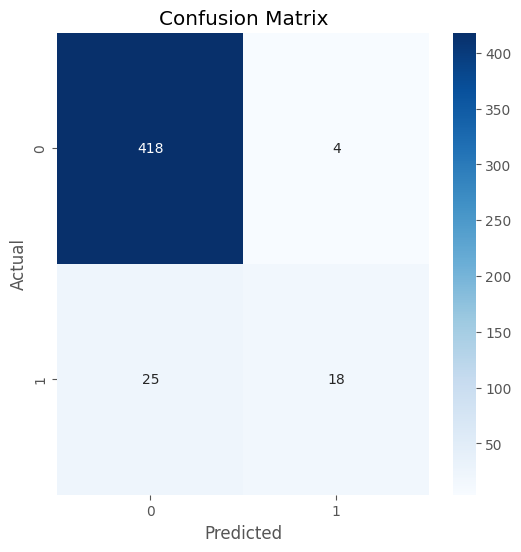

In [ ]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_rf, 'Precision': rf_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

print("Classification Report:")
print(rf_classification_report)

plt.figure(figsize=(6, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
